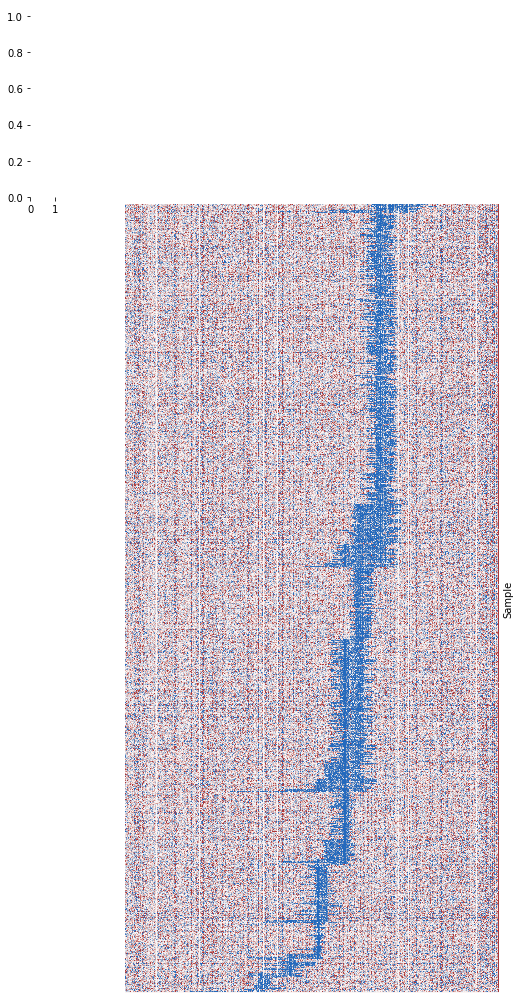

In [62]:
#This generates a heat map of all exons

import pandas as pd
import time
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

averages = pd.DataFrame() 


df = pd.read_csv('/path/to/singleCNVorder.csv', header = 0, names = ['A','Sample','B','Exons','Type','Cat','Order'])

df.drop(columns=['A','B'], axis=1, inplace=True)

results = pd.read_csv('/path/to/AllDelTest.csv', header = 0)

results_t = results.T
results_t.reset_index(inplace=True)


A = results_t['index']
results_t['Sample'] = A

results_t
results_t.fillna(0)
results_t.replace('', 0, inplace=True) 

results_t = results_t.rename_axis("A", axis="columns")
LJ = pd.merge(results_t,  
                     df,  
                     on ='Sample',  
                     how ='left') 

LJ.sort_values(by='Order', inplace=True)


test = LJ
data = test.T
    
test
test.set_index('Sample', inplace=True)
test = test.replace(r'^\s*$', np.nan, regex=True)
data = test.fillna(0)
data.drop(columns=['index','Type','Exons','Cat'], axis=1, inplace=True)

try:
    sns_plot = sns.clustermap(data, cmap="vlag", figsize=(7, 14), vmin=-0.5, vmax=0.5, row_cluster=False, col_cluster=False, xticklabels=False, yticklabels=False, cbar=False)
    sns_plot.savefig('/path/to/AllDel.png', dpi=600)
        
except:
    pass

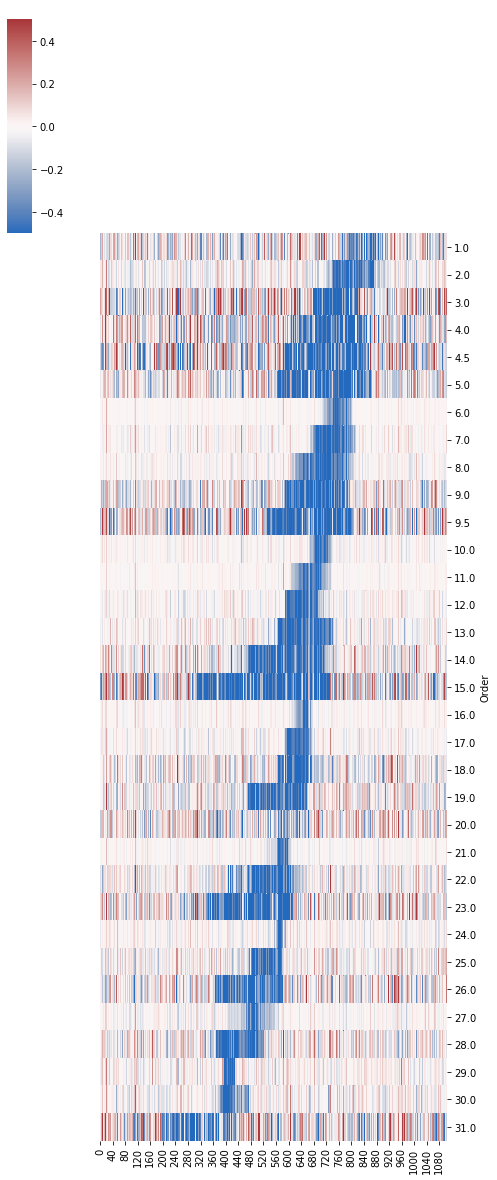

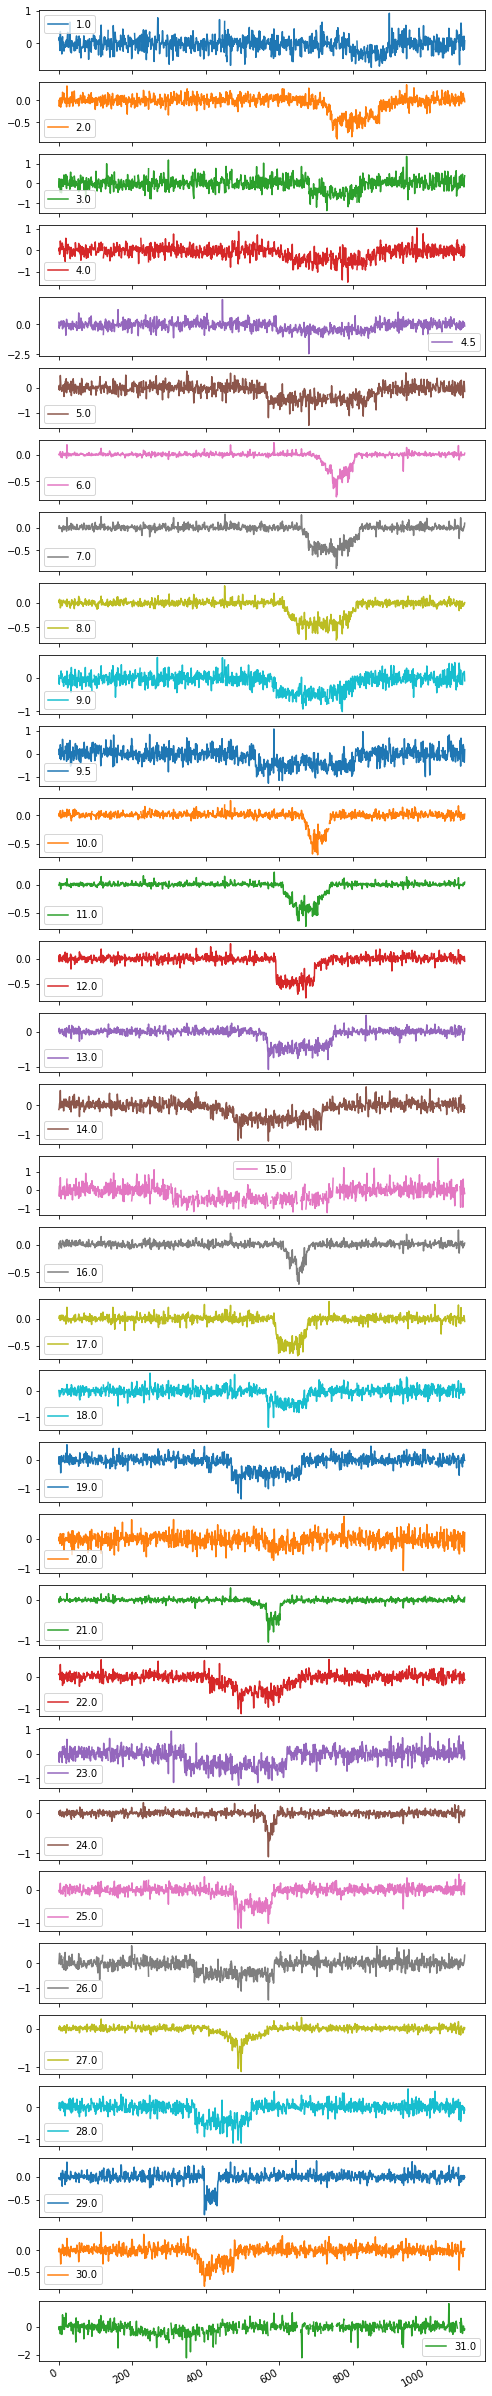

In [92]:
#This generates a heat map of the averaged value of each deletion category

import pandas as pd
import time
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

averages = pd.DataFrame() 


df = pd.read_csv('/path/to/singleCNVorder.csv', header = 0, names = ['A','Sample','B','Exons','Type','Cat','Order'])

df.drop(columns=['A','B'], axis=1, inplace=True)

results = pd.read_csv('/path/to/AllDelTest.csv', header = 0)

results_t = results.T
results_t.reset_index(inplace=True)


A = results_t['index']
results_t['Sample'] = A

results_t
results_t.fillna(0)
results_t.replace('', 0, inplace=True) 

results_t = results_t.rename_axis("A", axis="columns")
LJ = pd.merge(results_t,  
                     df,  
                     on ='Sample',  
                     how ='left') 

LJ.sort_values(by='Order', inplace=True)

AllStd = LJ.groupby(['Order']).std()
AllMean = LJ.groupby(['Order']).mean()

sns_plot = sns.clustermap(AllMean, cmap="vlag", figsize=(7, 16.5), vmin=-0.5, vmax=0.5, row_cluster=False, col_cluster=False)
sns_plot.savefig('/path/to/AllDelMeans.png', dpi=600)

AllMean.T.plot(subplots=True, figsize=(8, 48)); plt.legend(loc='best')
